In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('Salaries_and_Benefits_by_Job_Title.csv')

In [58]:
df.head(10)

,Year,Department,Job Code,Wages,Overtime,Fixed Benefits,Variable Benefits,Total,ObjectId
0,16,Parks & Community Services,AMG605 - Office Asst - PBM,3941.08,NaN,NaN,449.57,4390.65,1
1,17,Parks & Community Services,AMG605 - Office Asst - PBM,5891.99,NaN,NaN,537.20,6429.19,2
2,18,Parks & Community Services,AMG605 - Office Asst - PBM,5103.08,NaN,NaN,449.30,5552.38,3
3,14,Parks & Community Services,AMG605 - Office Asst - PBM,10426.25,NaN,NaN,1205.97,11632.22,4
4,15,Parks & Community Services,AMG605 - Office Asst - PBM,24947.10,NaN,NaN,2802.44,27749.54,5
5,16,Parks & Community Services,AMG605 - Office Asst - PBM,13880.15,330.25,NaN,1585.59,15795.99,6
6,16,Parks & Community Services,AMG605 - Office Asst - PBM,408.38,NaN,NaN,46.82,455.20,7
7,14,Parks & Community Services,AMG605 - Office Asst - PBM,6683.04,NaN,NaN,791.34,7474.38,8
8,15,Parks & Community Services,AMG605 - Office Asst - PBM,603.49,NaN,NaN,69.98,673.47,9
9,16,Parks & Community Services,AMG605 - Office Asst - PBM,3315.25,NaN,NaN,386.38,3701.63,10


In [59]:
df.shape

(17061, 9)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17061 entries, 0 to 17060
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               17061 non-null  object 
 1   Department         17059 non-null  object 
 2   Job Code           17059 non-null  object 
 3   Wages              17051 non-null  float64
 4   Overtime           5822 non-null   float64
 5   Fixed Benefits     13220 non-null  float64
 6   Variable Benefits  17058 non-null  float64
 7   Total              17061 non-null  float64
 8   ObjectId           17061 non-null  int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 1.2+ MB


In [61]:
df.columns


Index(['Year', 'Department', 'Job Code', 'Wages', 'Overtime', 'Fixed Benefits',
       'Variable Benefits', 'Total', 'ObjectId'],
      dtype='object')

In [62]:
#Checking for null values

df.isna().sum()/len(df)*100

Year                  0.000000
Department            0.011723
Job Code              0.011723
Wages                 0.058613
Overtime             65.875388
Fixed Benefits       22.513335
Variable Benefits     0.017584
Total                 0.000000
ObjectId              0.000000
dtype: float64

Cleaning the data



In [63]:
# Replacing Nan values with zeros

df = df.fillna(0)

#Checking Null values in the data set filling them with zero

missing  = df.isna().sum()/len(df)*100

print(missing)

Year                 0.0
Department           0.0
Job Code             0.0
Wages                0.0
Overtime             0.0
Fixed Benefits       0.0
Variable Benefits    0.0
Total                0.0
ObjectId             0.0
dtype: float64


In [64]:
# Checking the duplicate values in the dataset

duplicate = df.duplicated().sum()
print(f'There are {duplicate} values in the data set; we will remove them.')

There are 0 values in the data set; we will remove them.


In [65]:
#Coverting Year and datetime

df.fillna(0, inplace=True)

df = df[df['Year'] != 'GRAND TOTAL']

#Converting Year to datetime
df['Year'] = pd.to_datetime(df['Year'], format='%y')

In [66]:
#Dropping unnecesssary tables

df.drop('ObjectId', axis=1, inplace=True)

In [67]:
df.describe()

,Wages,Overtime,Fixed Benefits,Variable Benefits,Total
count,17060.000000,17060.000000,17060.000000,17060.000000,17060.000000
mean,53302.911835,2774.128028,8952.195555,9921.904735,74951.140152
std,45716.315837,7344.560637,7593.812323,8482.791280,63715.445536
min,-10196.860000,-993.240000,-14318.710000,-570.060000,-19061.650000
25%,7599.760000,0.000000,1.577500,1465.520000,10160.372500
50%,52356.670000,0.000000,11201.400000,9580.790000,75959.800000
75%,92012.095000,766.167500,16837.395000,16791.315000,129080.477500
max,327212.890000,91382.760000,30023.230000,52370.630000,395086.700000


In [68]:
df['Total Wages'] = df['Wages'] + df['Overtime'] + df['Fixed Benefits'] + df['Variable Benefits']

df.head(10)

,Year,Department,Job Code,Wages,Overtime,Fixed Benefits,Variable Benefits,Total,Total Wages
0,2016-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,3941.08,0.00,0.0,449.57,4390.65,4390.65
1,2017-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,5891.99,0.00,0.0,537.20,6429.19,6429.19
2,2018-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,5103.08,0.00,0.0,449.30,5552.38,5552.38
3,2014-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,10426.25,0.00,0.0,1205.97,11632.22,11632.22
4,2015-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,24947.10,0.00,0.0,2802.44,27749.54,27749.54
5,2016-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,13880.15,330.25,0.0,1585.59,15795.99,15795.99
6,2016-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,408.38,0.00,0.0,46.82,455.20,455.20
7,2014-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,6683.04,0.00,0.0,791.34,7474.38,7474.38
8,2015-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,603.49,0.00,0.0,69.98,673.47,673.47
9,2016-01-01,Parks & Community Services,AMG605 - Office Asst - PBM,3315.25,0.00,0.0,386.38,3701.63,3701.63


Top 5 Department Wages

In [69]:
department_wages = df.groupby('Department')['Total Wages'].sum()

print("Top 5 Department by Total Wages:")
print(department_wages.head().to_string())

Top 5 Department by Total Wages:
Department
0                     -87.69
All Depts            5089.70
City Attorney    27731982.45
City Clerk       13233865.89
City Council      2501277.44


Data Visualizations

Total Wages by Department

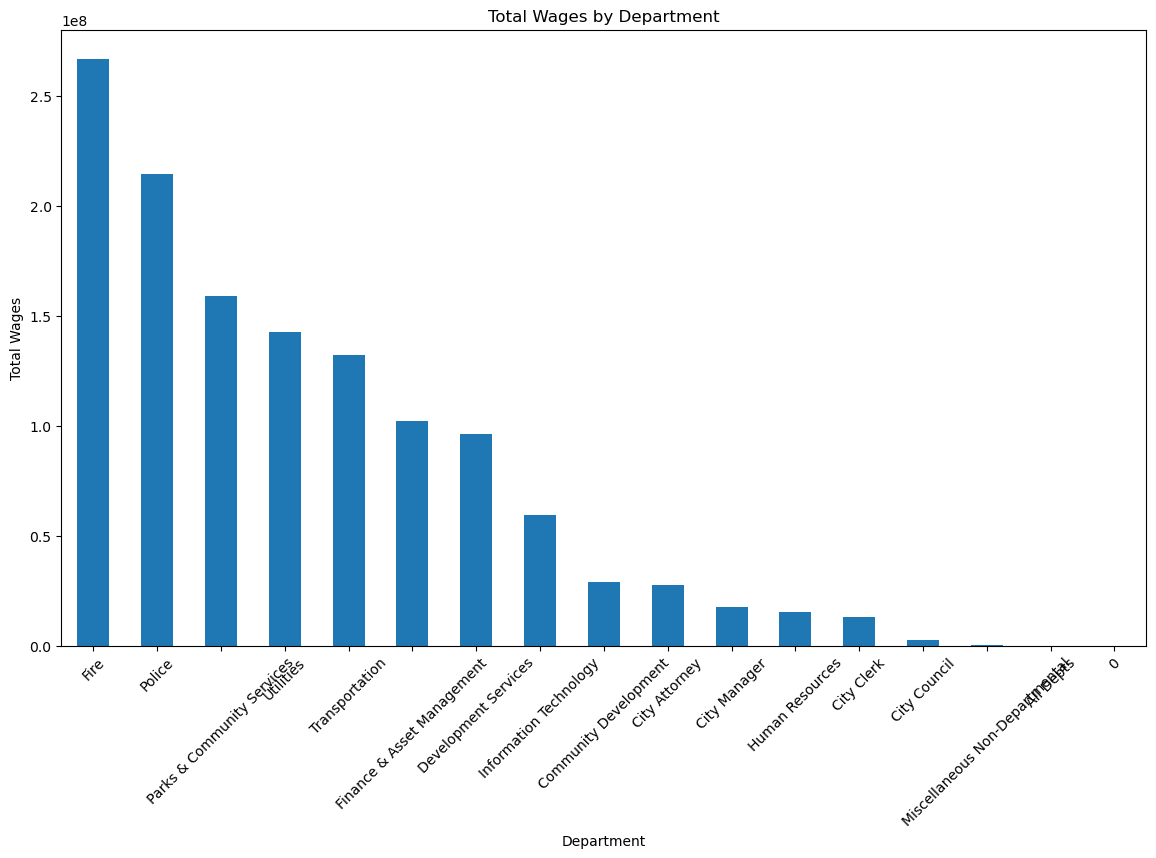

In [70]:
plt.figure(figsize=(14,8))
department_wages.sort_values(ascending=False).plot(kind='bar')
plt.title('Total Wages by Department')
plt.xlabel('Department')
plt.ylabel('Total Wages')
plt.xticks(rotation=45)

plt.show()

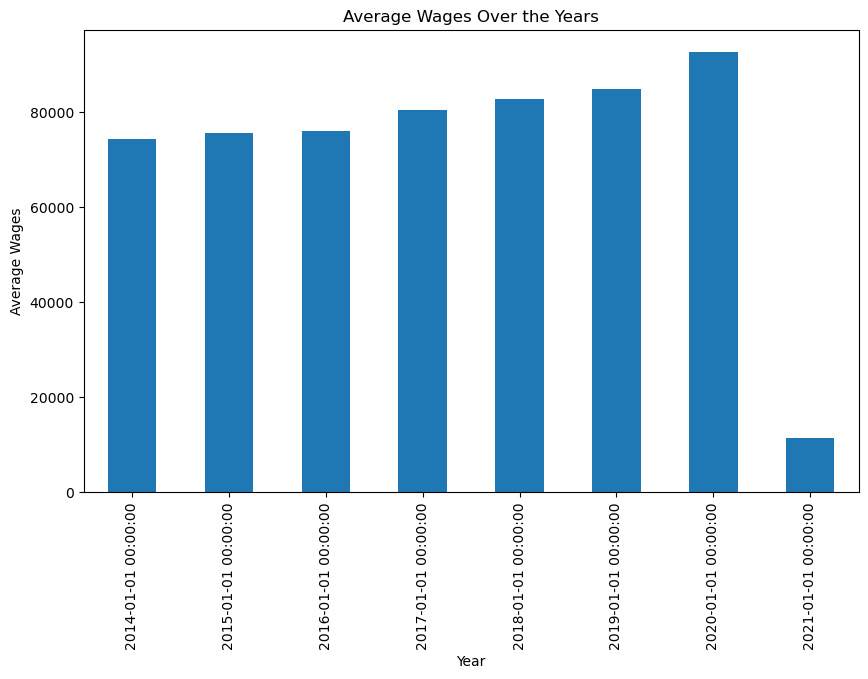

In [71]:
plt.figure(figsize=(10,6))

df.groupby('Year')['Total Wages'].mean().plot(kind='bar')
plt.title('Average Wages Over the Years')
plt.ylabel('Average Wages')
plt.xlabel('Year')

plt.show()

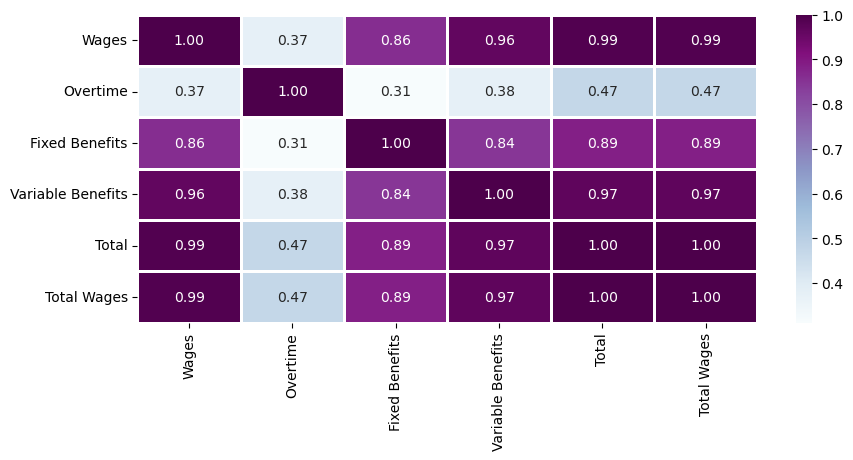

In [72]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, cmap='BuPu', fmt='.2f', linewidths=1)
plt.show()

Analysis 

The top 5 Departments with the highest wages are namely:

Fire
Police
Parks & Community Services
Utilities
Transportation

Model Building

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [79]:
from sklearn.preprocessing import LabelEncoder

df.fillna(0, inplace=True)
df['Total Wages']  = df['Wages'] + df['Overtime'] + df['Fixed Benefits'] + df['Variable Benefits']
df = df[df['Year'] != 'GRAND TOTAL']
X = df.drop(['Year', 'Department', 'Job Code', 'Total'], axis=1)
y =df['Department']

# Cleaning 'Department' column by stripping whitespace
df['Department'] = df['Department'].str.strip()

# Checking unique values in 'Department'
unique_departments = df['Department'].unique()
print(unique_departments)

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['Department'])

X = df.drop(['Year', 'Department', 'Job Code', 'Total'], axis=1)
y = y_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

['Parks & Community Services' 'Finance & Asset Management'
 'Transportation' 'Community Development' 'City Attorney' 'Utilities'
 'Development Services' 'Fire' 'City Clerk' 'Information Technology'
 'City Manager' 'Human Resources' 'Miscellaneous Non-Departmental'
 'Police' 'City Council' 'All Depts' nan]


In [80]:
#Scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODELING

In [81]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
}


results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

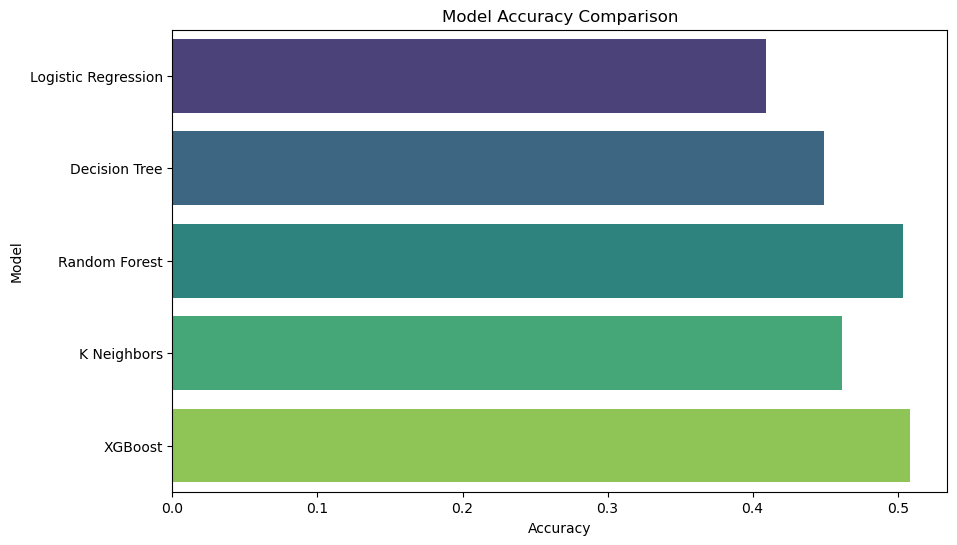

In [82]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.values()), y=list(results.keys()), palette='viridis')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Model Accuracy Comparison')
plt.savefig('Model Accuracy Comparison.png')
plt.show()